## LOAD DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# After saving the following zip file to your working directory extract all files and folders from zip file to local folder.

!unzip -q /content/drive/MyDrive/Colab_Notebooks/ML_201/HW/COVID-19_Radiography_Dataset.zip


## PREPROCESS DATA

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

from skimage.transform import resize
from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications  import VGG19, ResNet50, InceptionV3

from tensorflow.keras.preprocessing.image import load_img
from PIL import Image
from keras.preprocessing import image


In [ ]:
# Extracting all filenames iteratively from brain_tumor_dataset folder
base_path = '/content/COVID-19_Radiography_Dataset/'
categories = ['COVID/images','Normal/images','Viral Pneumonia/images']
# img_type = ['images']#, 'masks']
# load file names to fnames list object
fnames = []
for category in categories: 
  image_folder = os.path.join(base_path, category)
  file_names = os.listdir(image_folder)
  full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
  fnames.append(full_path)

print('number of images for each category:', [len(f) for f in fnames])
print(fnames[0:4]) #examples of file names

number of images for each category: [3616, 10192, 1345]
[['/content/COVID-19_Radiography_Dataset/COVID/images/COVID-2000.png', '/content/COVID-19_Radiography_Dataset/COVID/images/COVID-2384.png', '/content/COVID-19_Radiography_Dataset/COVID/images/COVID-1478.png', '/content/COVID-19_Radiography_Dataset/COVID/images/COVID-3581.png', '/content/COVID-19_Radiography_Dataset/COVID/images/COVID-1631.png', '/content/COVID-19_Radiography_Dataset/COVID/images/COVID-1395.png', '/content/COVID-19_Radiography_Dataset/COVID/images/COVID-2631.png', '/content/COVID-19_Radiography_Dataset/COVID/images/COVID-436.png', '/content/COVID-19_Radiography_Dataset/COVID/images/COVID-2890.png', '/content/COVID-19_Radiography_Dataset/COVID/images/COVID-3234.png', '/content/COVID-19_Radiography_Dataset/COVID/images/COVID-2248.png', '/content/COVID-19_Radiography_Dataset/COVID/images/COVID-2699.png', '/content/COVID-19_Radiography_Dataset/COVID/images/COVID-3359.png', '/content/COVID-19_Radiography_Dataset/COVID/i

In [ ]:
#Reduce number of images to first 1345 for each category
fnames[0]=fnames[0][0:1300]
fnames[1]=fnames[1][0:1300]
fnames[2]=fnames[2][0:1300]

In [ ]:
# Let's explore the details of the image data using load_img from keras


img = load_img('/content/COVID-19_Radiography_Dataset/COVID/images/COVID-10.png')

# report details about the image
# print(type(img))
# print(img.mode)
# print(img.size)

# Import image, load to array of shape height, width, channels, then min/max transform.


def preprocessor(img_path):
        img = Image.open(img_path).convert("RGB").resize((224,224)) # import image, make sure it's RGB and resize to height and width you want.
        img = (np.float32(img)-1.)/(255-1.) # min max transformation
        img=img.reshape((224,224,3)) # Create final shape as array with correct dimensions for Keras
        return img

preprocessed_image_data =list(map(preprocessor, fnames[0]+fnames[1]+fnames[2])) 

# Object needs to be an array rather than a list for Keras (map returns to list object)
X= np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model


In [ ]:
list_of_lists = fnames
flattened_list = list(itertools.chain(*list_of_lists))
data = []

for path in flattened_list:
    data.append(path.split('/'))
df = pd.DataFrame(data, columns=['drop_this','main', 'dataset', 'category', 'img_msk', 'file_name'])
# df = df.loc[df['img_msk'] == 'images']
y = pd.get_dummies(df['category'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.32, random_state = 1987)

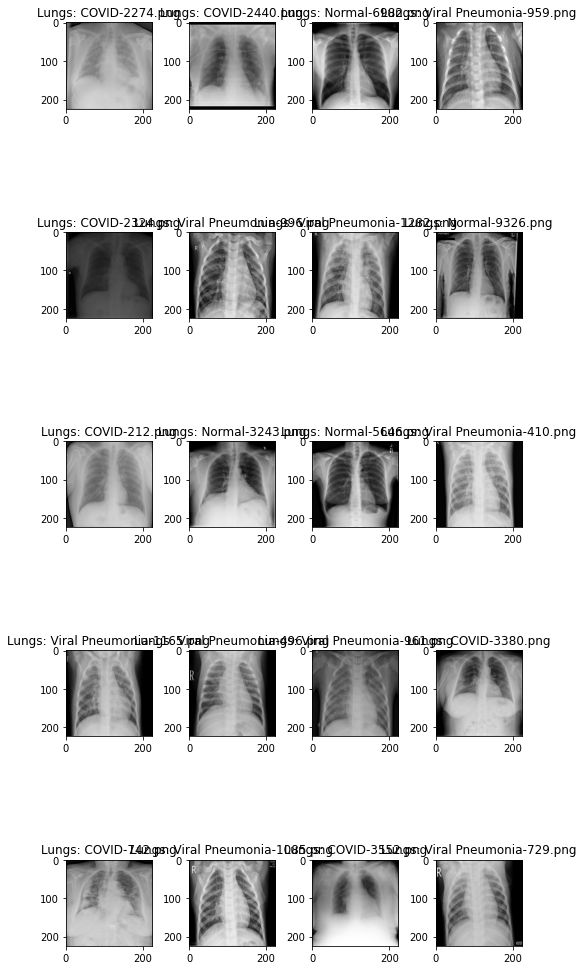

In [ ]:
fig,ax=plt.subplots(5,4)
fig.set_size_inches(7,15)
for i in range(5):
    for j in range(4):
        l= np.random.randint(0,len(X))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Lungs: '+flattened_list[l].split('/')[-1])
plt.tight_layout()

## FREE UP SPACE

In [ ]:
#Clear objects from memory
del(X)
del(y)
del(preprocessed_image_data)

In [ ]:
#Save data to be able to reload quickly if memory crashes or if you run Runtime>Restart Runtime
import pickle

# Open a file and use dump()
with open('X_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_train, file)

#Save data
import pickle

# Open a file and use dump()
with open('X_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_test, file)

#Save data
import pickle

# Open a file and use dump()
with open('y_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_train, file)


# Open a file and use dump()
with open('y_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_test, file)

In [ ]:
#If you run out of Colab memory restart runtime, reload data and try again
import pickle
  
# Open the file in binary mode
with open('X_train.pkl', 'rb') as file:
    # Call load method to deserialze
    X_train = pickle.load(file)

# Open the file in binary mode
with open('y_train.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)

## TRAIN AND TEST


#### Model 1

In [ ]:
import tensorflow as tf

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow. 
  model = tf.keras.Sequential([
    # input: images of size Sample size, height, width, channels 1x192x192x3 pixels (the three stands for RGB channels)    
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=128, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    # classifying into 5 categories
    tf.keras.layers.Dense(3, activation='softmax')
  ])
  #from tensorflow.python.keras.callbacks import ReduceLROnPlateau
  #red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs

  model.compile(
    optimizer="adam", # to use callback set lr arg such as Adam(lr=0.001) instead
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])
  
  # Fitting the CNN to the Training set
model.fit(X_train, y_train, epochs = 10, verbose=1,validation_split=.2, validation_data=(X_test,y_test))#, callbacks=[red_lr]) for callback that automatically adjusts lr

Epoch 1/10
83/83 [==============================] - 31s 171ms/step - loss: 0.7596 - accuracy: 0.6199 - val_loss: 0.6151 - val_accuracy: 0.7596
Epoch 2/10
83/83 [==============================] - 12s 147ms/step - loss: 0.4912 - accuracy: 0.8002 - val_loss: 0.4035 - val_accuracy: 0.8413
Epoch 3/10
83/83 [==============================] - 11s 136ms/step - loss: 0.3894 - accuracy: 0.8522 - val_loss: 0.3597 - val_accuracy: 0.8630
Epoch 4/10
83/83 [==============================] - 11s 134ms/step - loss: 0.2882 - accuracy: 0.8967 - val_loss: 0.3489 - val_accuracy: 0.8734
Epoch 5/10
83/83 [==============================] - 12s 147ms/step - loss: 0.2560 - accuracy: 0.9072 - val_loss: 0.3430 - val_accuracy: 0.8758
Epoch 6/10
83/83 [==============================] - 11s 133ms/step - loss: 0.2168 - accuracy: 0.9223 - val_loss: 0.2924 - val_accuracy: 0.9062
Epoch 7/10
83/83 [==============================] - 11s 133ms/step - loss: 0.1564 - accuracy: 0.9434 - val_loss: 0.3194 - val_accuracy: 0.8990

In [ ]:
# Save tf.keras model (or any tensorflow model) to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(model, framework='keras',
                          transfer_learning=True,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#### Model 2

In [ ]:
with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.
  model = tf.keras.Sequential([
    # input: images of size Sample size, height, width, channels 1x192x192x3 pixels (the three stands for RGB channels)    
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(kernel_size=1, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=128, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=256, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=256, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    # classifying into 5 categories
    tf.keras.layers.Dense(3, activation='softmax')
  ])
  #from tensorflow.python.keras.callbacks import ReduceLROnPlateau
  #red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs

  model.compile(
    optimizer="adam", # to use callback set lr arg such as Adam(lr=0.001) instead
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])
  
  # Fitting the CNN to the Training set
model.fit(X_train, y_train, epochs = 10, verbose=1,validation_split=.2, validation_data=(X_test,y_test))#, callbacks=[red_lr]) for callback that automatically adjusts lr

Epoch 1/10
83/83 [==============================] - 61s 500ms/step - loss: 0.7801 - accuracy: 0.6097 - val_loss: 0.5890 - val_accuracy: 0.7300
Epoch 2/10
83/83 [==============================] - 32s 386ms/step - loss: 0.5662 - accuracy: 0.7496 - val_loss: 0.4795 - val_accuracy: 0.8029
Epoch 3/10
83/83 [==============================] - 31s 378ms/step - loss: 0.4524 - accuracy: 0.8186 - val_loss: 0.3628 - val_accuracy: 0.8598
Epoch 4/10
83/83 [==============================] - 34s 410ms/step - loss: 0.3401 - accuracy: 0.8680 - val_loss: 0.3363 - val_accuracy: 0.8782
Epoch 5/10
83/83 [==============================] - 32s 392ms/step - loss: 0.2868 - accuracy: 0.8925 - val_loss: 0.3534 - val_accuracy: 0.8726
Epoch 6/10
83/83 [==============================] - 33s 397ms/step - loss: 0.2753 - accuracy: 0.8997 - val_loss: 0.3164 - val_accuracy: 0.8790
Epoch 7/10
83/83 [==============================] - 37s 449ms/step - loss: 0.2199 - accuracy: 0.9167 - val_loss: 0.3315 - val_accuracy: 0.8734

In [ ]:
# Save tf.keras model (or any tensorflow model) to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#### Model 3: Data augmentation + CNN Model 1

In [ ]:
with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.
  model = tf.keras.Sequential([
    # input: images of size Sample size, height, width, channels 1x192x192x3 pixels (the three stands for RGB channels)    
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(kernel_size=1, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=128, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=256, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=256, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    # classifying into 5 categories
    tf.keras.layers.Dense(3, activation='softmax')
  ])
  #from tensorflow.python.keras.callbacks import ReduceLROnPlateau
  #red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs

  model.compile(
    optimizer="adam", # to use callback set lr arg such as Adam(lr=0.001) instead
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])
  
  # Fitting the CNN to the Training set
model.fit(X_train, y_train, epochs = 10, verbose=1,validation_split=.2, validation_data=(X_test,y_test))#, callbacks=[red_lr]) for callback that automatically adjusts lr

Epoch 1/10
83/83 [==============================] - 1547s 19s/step - loss: 1.0432 - accuracy: 0.4231 - val_loss: 0.7321 - val_accuracy: 0.6627
Epoch 2/10
83/83 [==============================] - 1495s 18s/step - loss: 0.6377 - accuracy: 0.7229 - val_loss: 0.5222 - val_accuracy: 0.7580
Epoch 3/10
35/83 [===========>..................] - ETA: 12:24 - loss: 0.5126 - accuracy: 0.7902

In [ ]:
# example of image augmentation for single image
# see more options here: https://keras.io/preprocessing/image/
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = img

# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
image_gen_train = ImageDataGenerator(
        zoom_range=0.5,
        rotation_range=90,
        horizontal_flip=True,
        vertical_flip=True)
# prepare iterator
it = image_gen_train.flow_from_directory(samples, batch_size=1)


NameError: ignored

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.5,

        horizontal_flip=True,
        vertical_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe=trainingdata,
        directory=None,
        x_col="X", # Actual column names from data
        y_col="y",
        target_size=(224, 224),
        batch_size=1,
        class_mode='binary',shuffle=True)

#### Model 4: Transfer Learning

In [ ]:
base_model = InceptionV3(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224,224, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
base_input = base_model.layers[0].input 
base_output = base_model.layers[-2].input 
final_output = tf.keras.layers.Dense(3)(base_output)
new_model = tf.keras.Model(inputs=base_input, outputs= final_output)

new_model.compile(optimizer='adam',
                       loss= 'categorical_crossentropy',
                       metrics=['accuracy'])
new_model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10


ValueError: ignored

Epoch 1/10


ValueError: ignored

In [ ]:
base_model = InceptionV3(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224,224, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

base_input = base_model.layers[0].input 
base_output = base_model.layers[-2].input 
final_output = tf.keras.layers.Dense(5)(base_output)
final_output = tf.reshape(final_output, shape=[-1, 224, 224, 3])
new_model = tf.keras.Model(inputs=base_input, outputs= final_output)

new_model.compile(optimizer='adam',
                       loss= 'categorical_crossentropy',
                       metrics=['accuracy'])
new_model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10


ValueError: ignored

In [ ]:
base_model.trainable = False
inputs = keras.Input(shape=(224,224, 3))

x = base_model(inputs, training=False)

# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

#### Model. 5: attempt 2 at Transfer learning

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

layer = keras.layers.Dense(3)
layer.build((None, 4))  # Create the weights

print("weights:", len(layer.weights))
print("trainable_weights:", len(layer.trainable_weights))
print("non_trainable_weights:", len(layer.non_trainable_weights))

weights: 2
trainable_weights: 2
non_trainable_weights: 0
weights: 4
trainable_weights: 2
non_trainable_weights: 2


In [ ]:
layer = keras.layers.BatchNormalization()
layer.build((None, 4))  # Create the weights

print("weights:", len(layer.weights))
print("trainable_weights:", len(layer.trainable_weights))
print("non_trainable_weights:", len(layer.non_trainable_weights))

weights: 4
trainable_weights: 2
non_trainable_weights: 2


In [ ]:
layer = keras.layers.Dense(3)
layer.build((None, 4))  # Create the weights
layer.trainable = False  # Freeze the layer

print("weights:", len(layer.weights))
print("trainable_weights:", len(layer.trainable_weights))
print("non_trainable_weights:", len(layer.non_trainable_weights))

weights: 2
trainable_weights: 0
non_trainable_weights: 2


In [ ]:
# Make a model with 2 layers
layer1 = keras.layers.Dense(3, activation="relu")
layer2 = keras.layers.Dense(3, activation="sigmoid")
model = keras.Sequential([keras.Input(shape=(3,)), layer1, layer2])

# Freeze the first layer
layer1.trainable = False

# Keep a copy of the weights of layer1 for later reference
initial_layer1_weights_values = layer1.get_weights()

# Train the model
model.compile(optimizer="adam", loss="mse")
model.fit(np.random.random((2, 3)), np.random.random((2, 3)))

# Check that the weights of layer1 have not changed during training
final_layer1_weights_values = layer1.get_weights()
np.testing.assert_allclose(
    initial_layer1_weights_values[0], final_layer1_weights_values[0]
)
np.testing.assert_allclose(
    initial_layer1_weights_values[1], final_layer1_weights_values[1]
)

1/1 [==============================] - 1s 1s/step - loss: 0.0443


In [ ]:
inner_model = keras.Sequential(
    [
        keras.Input(shape=(3,)),
        keras.layers.Dense(3, activation="relu"),
        keras.layers.Dense(3, activation="relu"),
    ]
)

model = keras.Sequential(
    [keras.Input(shape=(3,)), inner_model, keras.layers.Dense(3, activation="sigmoid"),]
)

model.trainable = False  # Freeze the outer model

assert inner_model.trainable == False  # All layers in `model` are now frozen
assert inner_model.layers[0].trainable == False  # `trainable` is propagated recursively

In [ ]:
base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224,224, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])
model.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test))

Epoch 1/20


ValueError: ignored

# Holding pen

In [ ]:
# Begin to submit models to image classification leaderboard
! pip install aimodelshare --upgrade
# Restart session Runtime > Restart runtime

In [ ]:
model.save("model1.h5", save_format="h5")

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('model1.h5',compile=False)
model.compile(
    optimizer="adam", # to use callbaAck set lr arg such as Adam(lr=0.001) instead
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])
model.summary()